<a href="https://colab.research.google.com/github/salimhamad/EEG-Project/blob/main/EEG-to-Text-Translation-using-Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# ١. دیاریکردنی کات (بۆ ماوەی ١ چرکە، ٢٥٠ دانە داتا)
sampling_rate = 250
t = np.linspace(0, 1, sampling_rate)

# ٢. دروستکردنی شەپۆلێکی مێشک (بۆ نموونە شەپۆلی Alpha کە ١٠ هێرتزە)
# لێرەدا NumPy وەک فانکشنێکی سێگۆشەزانی (Sine wave) بەکاری دەهێنێت
alpha_wave = np.sin(2 * np.pi * 10 * t)

# ٣. زیادکردنی کەمێک "ژاوەژاو" (Noise) وەک ئەوەی لە توێژینەوەکەدا بوو
noise = np.random.normal(0, 0.5, sampling_rate)
eeg_signal = alpha_wave + noise

# ٤. نیشاندانی زانیارییە بیرکارییەکانی ماتریکسەکە
print(f"شێوەی ماتریکسەکە (Shape): {eeg_signal.shape}")
print(f"پێنج ژمارەی یەکەمی شەپۆلەکە: {eeg_signal[:250]}")

شێوەی ماتریکسەکە (Shape): (250,)
پێنج ژمارەی یەکەمی شەپۆلەکە: [-0.76091499  0.61044507  1.51549191  0.79167795  1.04335236  0.73900701
  0.64673235  0.94358287  0.75722029  1.52278557  1.06239463  0.0679662
  0.60636139 -0.46824118 -0.79749944 -1.1765501  -0.79053028 -0.45964834
 -0.53597966 -1.26327549 -2.06617693 -0.88325069 -0.93779798 -0.33790807
 -0.18924318  0.26394795  0.33955895  0.58365153  1.44709541  1.3440101
  0.82443412  0.27153514  1.27052383  0.58294683  0.94964464 -0.01684479
 -0.42562183  0.94508268  1.19165947  0.10657749 -0.98864321 -1.96736254
 -0.07023063 -0.86253891 -0.89693956 -1.55135275  0.2392016  -0.87083422
 -1.11935084 -0.37912569 -0.02274381  0.28138477  0.52037471  1.19299635
  0.94597437  0.34844553  1.56049229  0.63464369  0.20380179  0.44131407
  0.74615535  0.6552913  -0.35536665 -0.47058208  0.94239691  0.03292296
  0.08548477 -0.5608488  -1.66366158 -0.41941631 -0.5291144  -0.66511832
 -0.22505423  0.42343032 -0.25987962  0.4960343   0.92522081  1.

In [18]:
import torch
import torch.nn as nn

# ١. دروستکردنی ماتریکسێکی نموونەیی (Batch, Channels, Time)
# لێرەدا: ١ دانە نموونە، ٨ وایەری EEG، و ٢٥٠ دانە داتای کات
eeg_data = torch.randn(1, 8, 250)

# ٢. گۆڕینی قەبارەی ماتریکسەکە تا بۆ Transformer بگونجێت
# Transformer چاوەڕێی (Time, Batch, Features) دەکات
eeg_input = eeg_data.permute(2, 0, 1)

# ٣. ناردنی بۆ ناو چینی Transformer
transformer_layer = nn.TransformerEncoderLayer(d_model=8, nhead=4)
output = transformer_layer(eeg_input)

print(f"شێوەی دەرچوونی مۆدێلەکە: {output.shape}")

شێوەی دەرچوونی مۆدێلەکە: torch.Size([250, 1, 8])


In [19]:
import torch
import torch.nn as nn
import numpy as np

# قۆناغی ١: دروستکردنی داتای EEG بە NumPy (وەک پێشتر باسمان کرد)
sampling_rate = 250
eeg_np = np.random.normal(0, 1, (1, 8, sampling_rate)) # ١ نموونە، ٨ وایەر، ٢٥٠ کات

# قۆناغی ٢: گۆڕینی بۆ Tensor (پایتۆن بۆ پایتۆرچ)
eeg_tensor = torch.tensor(eeg_np, dtype=torch.float32)

# قۆناغی ٣: مۆدێلێکی سادە کە Transformer و Softmax تێدایە
class EEGTranslator(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.enc = nn.TransformerEncoderLayer(d_model=250, nhead=5)
        self.fc = nn.Linear(250, vocab_size) # گۆڕین بۆ قەبارەی فەرهەنگ
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = self.enc(x)
        x = x.mean(dim=1) # تێکڕای وایەرەکان وەردەگرین
        logits = self.fc(x)
        return self.softmax(logits)

# قۆناغی ٤: ڕەنکردنی مۆدێلەکە بۆ فەرهەنگێک کە ١٠٠٠ وشەی تێدایە
model = EEGTranslator(vocab_size=1000)
probabilities = model(eeg_tensor)

# دۆزینەوەی ئەو وشەیەی ئەگەری زۆرترە
predicted_word_index = torch.argmax(probabilities)
print(f"کۆدی ئەو وشەیەی مۆدێلەکە پێشبینی کردووە: {predicted_word_index.item()}")

کۆدی ئەو وشەیەی مۆدێلەکە پێشبینی کردووە: 342


In [20]:
# ١. دیاریکردنی "سزا" (Loss Function) و "ڕێبەر" (Optimizer)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ٢. خولی مەشقپێکردن (Training Loop)
for epoch in range(100): # ١٠٠ جار داتاکە دووبارە بکەرەوە
    # ا. پاککردنی یادگاری ڕێبەرەکە
    optimizer.zero_grad()

    # ب. پێشبینیکردنی وشە (Forward Pass)
    output = model(eeg_tensor)

    # ج. دیاریکردنی ڕاستی (Target) - بۆ نموونە دەزانین وشەی ٥٠٠ ڕاستە
    target = torch.tensor([500])

    # د. هەژمارکردنی بڕی هەڵەکە
    loss = criterion(output, target)

    # هـ. گەڕانەوە بۆ دواوە بۆ گۆڕینی کێشەکان (Backpropagation)
    loss.backward()

    # و. هەنگاونان بەرەو باشتربوون
    optimizer.step()

    if epoch % 10 == 0:
        print(f"قۆناغی {epoch}, بڕی هەڵە: {loss.item()}")

قۆناغی 0, بڕی هەڵە: 6.907888889312744
قۆناغی 10, بڕی هەڵە: 5.922957897186279
قۆناغی 20, بڕی هەڵە: 5.911274433135986
قۆناغی 30, بڕی هەڵە: 5.910162925720215
قۆناغی 40, بڕی هەڵە: 5.9098711013793945
قۆناغی 50, بڕی هەڵە: 5.909788608551025
قۆناغی 60, بڕی هەڵە: 5.909775257110596
قۆناغی 70, بڕی هەڵە: 5.909747123718262
قۆناغی 80, بڕی هەڵە: 5.909712791442871
قۆناغی 90, بڕی هەڵە: 5.909695625305176


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# ١. دروستکردنی داتای دەستکرد (Simulation)
# وەک ئەوەی ٨ وایەری EEG مان هەبێت و ٢ جۆر شەپۆلمان هەبێت
def generate_fake_eeg(num_samples=100):
    signals = []
    labels = []
    for _ in range(num_samples):
        label = np.random.randint(0, 2)  # 0 بۆ وشەی "ئاو"، 1 بۆ وشەی "نان"
        # دروستکردنی شەپۆل بە لەرەلەری جیاواز بۆ هەر وشەیەک
        freq = 10 if label == 0 else 40
        t = np.linspace(0, 1, 250)
        signal = np.sin(2 * np.pi * freq * t) + np.random.normal(0, 0.5, 250)
        signals.append([signal] * 8) # دووبارەکردنەوە بۆ ٨ وایەر
        labels.append(label)
    return torch.tensor(signals, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)

# ٢. پێناسەکردنی مۆدێلی Transformer (بۆ وەرگێڕانی شەپۆل)
class SimpleBrainTranslator(nn.Module):
    def __init__(self):
        super().__init__()
        # بەکارهێنانی Transformer بۆ دۆزینەوەی پەیوەندی نێوان کاتەکان
        self.transformer_layer = nn.TransformerEncoderLayer(d_model=250, nhead=5)
        self.fc = nn.Linear(250, 2) # تەنها ٢ وشەمان هەیە

    def forward(self, x):
        # x shape: [Batch, Channels, Time]
        x = self.transformer_layer(x)
        x = x.mean(dim=1) # تێکڕای وایەرەکان
        return self.fc(x)

# ٣. ئامادەکردنی مەشقەکە
model = SimpleBrainTranslator()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
data, targets = generate_fake_eeg(200)

# ٤. خولی مەشقپێکردن (The Training Loop)
print("دەستپێکردنی مەشقپێکردنی مۆدێلەکە...")
for epoch in range(50):
    optimizer.zero_grad()
    outputs = model(data)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"قۆناغی {epoch} | بڕی هەڵە (Loss): {loss.item():.4f}")

print("\nمەشقەکە کۆتایی هات! مۆدێلەکە ئێستا دەتوانێت شەپۆلەکان بناسێتەوە.")

دەستپێکردنی مەشقپێکردنی مۆدێلەکە...
قۆناغی 0 | بڕی هەڵە (Loss): 0.8056
قۆناغی 10 | بڕی هەڵە (Loss): 0.0000
قۆناغی 20 | بڕی هەڵە (Loss): 0.0000
قۆناغی 30 | بڕی هەڵە (Loss): 0.0000
قۆناغی 40 | بڕی هەڵە (Loss): 0.0000

مەشقەکە کۆتایی هات! مۆدێلەکە ئێستا دەتوانێت شەپۆلەکان بناسێتەوە.


ڕاستی (Target): ئاو (Water)
پێشبینی مۆدێل (Prediction): ئاو (Water)


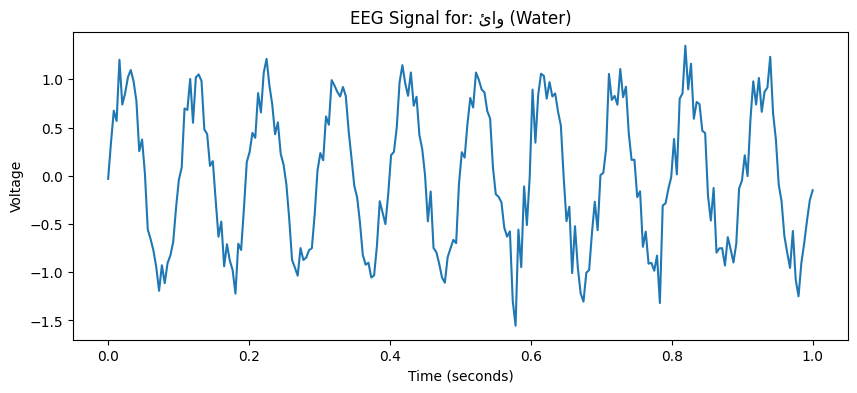

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# ١. دروستکردنی فەرهەنگێکی بچووک
vocab = {0: "ئاو (Water)", 1: "نان (Bread)"}

# ٢. دروستکردنی شەپۆل و لکاندنی بە وشەکانەوە (لێرەدا وشەکە دەدەین بە مۆدێل)
def generate_data(num_samples=1):
    signals = []
    labels = []
    for _ in range(num_samples):
        label = np.random.randint(0, 2) # لێرەدا دیاری دەکەین کام وشە بێت
        freq = 10 if label == 0 else 40 # ئەگەر ئاو بوو لەرەلەر کەم بێت، ئەگەر نان بوو زۆر
        t = np.linspace(0, 1, 250)
        signal = np.sin(2 * np.pi * freq * t) + np.random.normal(0, 0.2, 250)
        signals.append([signal] * 8)
        labels.append(label)
    return torch.tensor(signals, dtype=torch.float32), torch.tensor(labels, dtype=torch.long), t

# ٣. دروستکردنی مۆدێلەکە (وەک پێشوو)
class BrainTranslator(nn.Module):
    def __init__(self):
        super().__init__()
        self.transformer = nn.TransformerEncoderLayer(d_model=250, nhead=5)
        self.fc = nn.Linear(250, 2)
    def forward(self, x):
        x = self.transformer(x)
        x = x.mean(dim=1)
        return self.fc(x)

# ٤. مەشقپێکردنێکی خێرا
model = BrainTranslator()
optimizer = optim.Adam(model.parameters(), lr=0.01)
data, targets, t = generate_data(100)

for epoch in range(100):
    optimizer.zero_grad()
    loss = nn.CrossEntropyLoss()(model(data), targets)
    loss.backward()
    optimizer.step()

# ٥. تاقیکردنەوە و پرینتکردنی ئەنجام (Inference)
test_signal, test_label, t_axis = generate_data(1) # دروستکردنی یەک شەپۆلی نوێ
model.eval()
with torch.no_grad():
    prediction = model(test_signal)
    predicted_index = torch.argmax(prediction).item()

# --- لێرەدا شەپۆلەکە و وشەکە نیشان دەدەین ---
print(f"ڕاستی (Target): {vocab[test_label[0].item()]}")
print(f"پێشبینی مۆدێل (Prediction): {vocab[predicted_index]}")

plt.figure(figsize=(10, 4))
plt.plot(t_axis, test_signal[0][0].numpy()) # تەنها یەک وایەر نیشان دەدەین
plt.title(f"EEG Signal for: {vocab[predicted_index]}")
plt.xlabel("Time (seconds)")
plt.ylabel("Voltage")
plt.show()